<a href="https://colab.research.google.com/github/siddheshgujar/Deep-learning/blob/main/Restaurant_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Restaurant Sentiment Analysis Project- Siddhesh Gujar

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Reading the tsv(Tap Seperated values)

In [3]:
import pandas as pd
df = pd.read_csv('/content/Restaurant_Reviews.tsv', sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Preprocessing the text



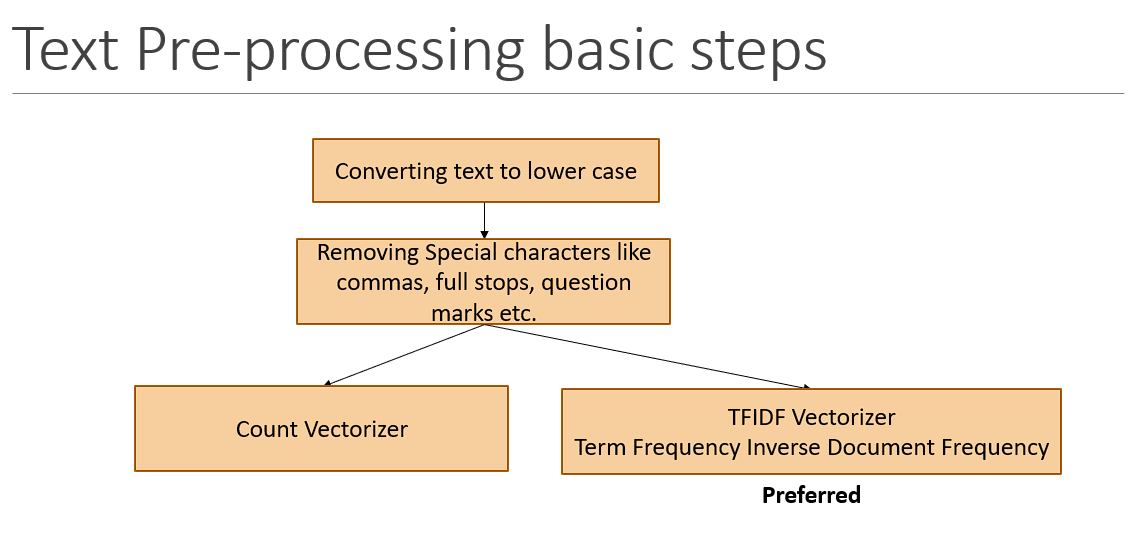

In [4]:
st = "Hi all, Welcome to ETLHive!..."


In [5]:
st2 = st.lower()
st2

'hi all, welcome to etlhive!...'

In [6]:
import re
st3 = re.sub("[^a-z ]", "", st2)
st3

'hi all welcome to etlhive'

In [7]:
def preprocess_text(st):
  # Convert text to lower case
  s = st.lower()
  # Remove the punctuation marks
  s = re.sub("[^a-z ]", "", s)
  return s

In [8]:
preprocess_text("WELCOME To ETLHive !....")

'welcome to etlhive '

In [9]:
df['pre'] = df['Review'].apply(preprocess_text)
df

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


## Apply TFIDF (Term Frequency - Inverse Document Frequency)

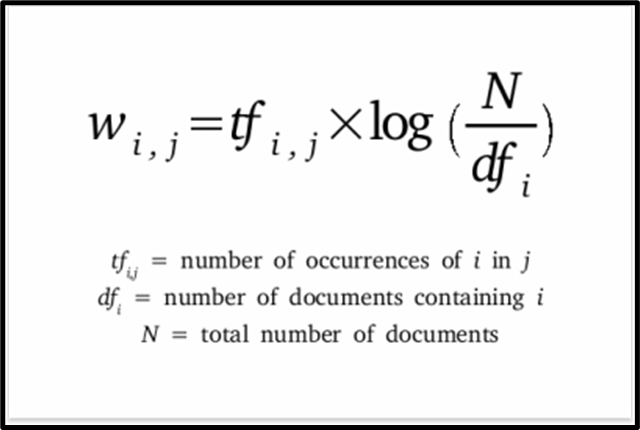

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tf = TfidfVectorizer()
X_pre = tf.fit_transform(df['pre']).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
 X_pre.shape

(1000, 2046)

In [14]:

Y = df['Liked']

In [15]:
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

## Apply train test split

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2,
                                                random_state=42)

In [17]:
xtrain.shape

(800, 2046)

In [18]:
xtest.shape

(200, 2046)

In [20]:
xtrain.shape[1]

2046

In [21]:
ytrain

29     0
535    1
695    0
557    0
836    1
      ..
106    1
270    1
860    1
435    0
102    1
Name: Liked, Length: 800, dtype: int64

In [22]:
ytest

521    1
737    1
740    1
660    1
411    1
      ..
408    1
332    1
208    0
613    0
78     1
Name: Liked, Length: 200, dtype: int64

## Create a simple Neural network

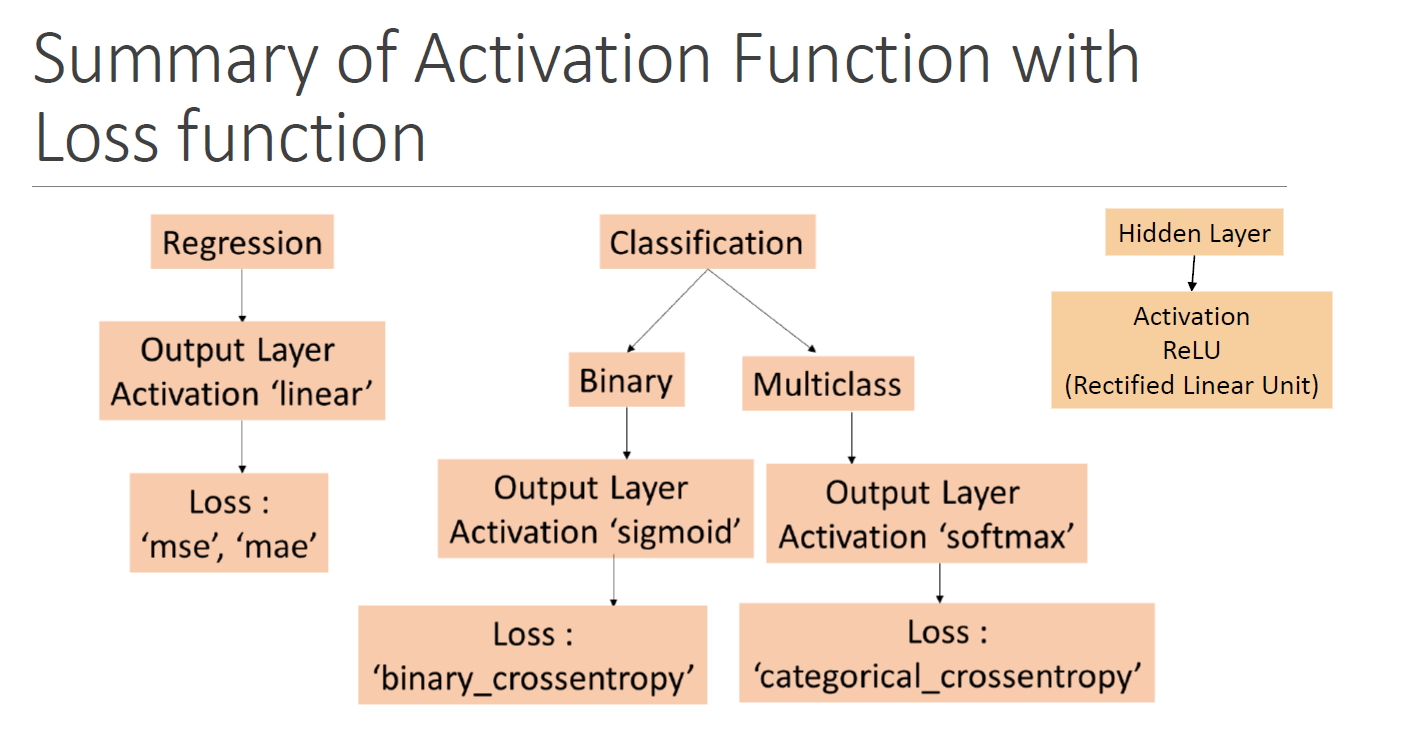

In [23]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [24]:
model = Sequential()

# Add an input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add a Hidden Layer 1
model.add(Dense(units=64, activation='relu'))
# Add a dropout layer
model.add(Dropout(rate=0.4))
# Add Hidden Layer 2
model.add(Dense(units=32, activation='relu'))
# Add a dropout layer
model.add(Dropout(rate=0.3))
# Output layer
model.add(Dense(1, activation='sigmoid'))


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                131008    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 133121 (520.00 KB)
Trainable params: 133121 (520.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model compilation

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Create a early stopping callback

In [27]:
es = EarlyStopping(monitor='val_loss', patience=10)

## Train the neural network

In [28]:
hist = model.fit(xtrain, ytrain, validation_split=0.1,
                 epochs=100, callbacks=[es])

Epoch 1/100
23/23 [==============================] - 3s 30ms/step - loss: 0.6907 - accuracy: 0.5500 - val_loss: 0.6889 - val_accuracy: 0.6500
Epoch 2/100
23/23 [==============================] - 0s 12ms/step - loss: 0.6810 - accuracy: 0.6514 - val_loss: 0.6815 - val_accuracy: 0.7000
Epoch 3/100
23/23 [==============================] - 0s 14ms/step - loss: 0.6518 - accuracy: 0.8056 - val_loss: 0.6615 - val_accuracy: 0.7625
Epoch 4/100
23/23 [==============================] - 0s 10ms/step - loss: 0.5894 - accuracy: 0.8542 - val_loss: 0.6112 - val_accuracy: 0.7875
Epoch 5/100
23/23 [==============================] - 0s 11ms/step - loss: 0.4831 - accuracy: 0.9056 - val_loss: 0.5385 - val_accuracy: 0.7750
Epoch 6/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3441 - accuracy: 0.9361 - val_loss: 0.4672 - val_accuracy: 0.8250
Epoch 7/100
23/23 [==============================] - 0s 13ms/step - loss: 0.2084 - accuracy: 0.9653 - val_loss: 0.4087 - val_accuracy: 0.8000
Epoch 

## Evaluate model in train and test

In [29]:
model.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 5ms/step - loss: 0.0432 - accuracy: 0.9812


[0.043187957257032394, 0.981249988079071]

In [30]:
model.evaluate(xtest, ytest)

7/7 [==============================] - 0s 5ms/step - loss: 0.6288 - accuracy: 0.8000


[0.6287668347358704, 0.800000011920929]

## Predicting probability for train and test

In [31]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

7/7 [==============================] - 0s 4ms/step


In [32]:
yprob_train[0:5]

array([[1.7962749e-03],
       [9.9894100e-01],
       [1.6115779e-04],
       [2.3661609e-04],
       [9.9909943e-01]], dtype=float32)

In [33]:
yprob_test[0:5]

array([[0.12093344],
       [0.99935573],
       [0.9995161 ],
       [0.99864584],
       [0.92744386]], dtype=float32)

## Getting predictions from probability

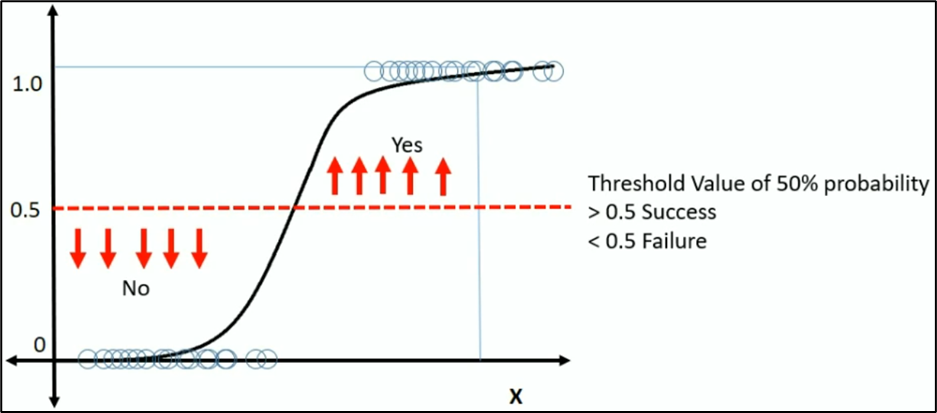

In [34]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

In [35]:

ytrain[0:5]

29     0
535    1
695    0
557    0
836    1
Name: Liked, dtype: int64

In [36]:
ypred_train[0:5]

[0, 1, 0, 0, 1]

In [37]:
ytest[0:5]

521    1
737    1
740    1
660    1
411    1
Name: Liked, dtype: int64

In [38]:
ypred_test[0:5]

[0, 1, 1, 1, 1]

## Create a confusion matrix for test data

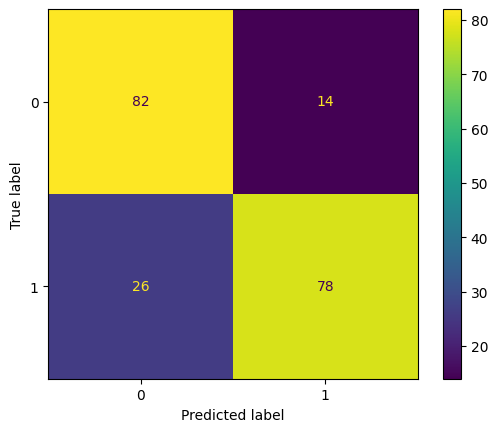

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

## Print classification report for test

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



### Above is a good model and can be used for any future predictions


In [41]:
model.save('ReviewSentiment.keras')

## Load above model

In [43]:
from keras.models import load_model
m = load_model('/content/ReviewSentiment.keras')
m.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                131008    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 133121 (520.00 KB)
Trainable params: 133121 (520.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Predicting sentiments provide by user from the model

In [44]:
def predict_sentiment(model, tf):
  # Take input review from user
  xnew = input('Please enter a review : ')
  # Preprocess the text data
  xnew2 = preprocess_text(xnew)
  print(f'Preprocessed Text : {xnew2}')
  # Apply tfidf.transform
  xnew_pre = tf.transform([xnew2]).toarray()
  # Predict the probability
  prob = model.predict([xnew_pre])
  print(f'Probability that statement is positive : {prob}')
  # Predict the sentiment
  if prob>=0.5:
    print(f'The Given Statement is POSTIVE')
  else:
    print(f'The Given Statement is NEGATIVE')

In [45]:

predict_sentiment(model, tf)

Please enter a review : Wow, Its just a lovely place!...
Preprocessed Text : wow its just a lovely place
1/1 [==============================] - 0s 63ms/step
Probability that statement is positive : [[0.99554724]]
The Given Statement is POSTIVE


In [46]:
predict_sentiment(model, tf)

Please enter a review : I just hated the place! The taste of food was not that great.
Preprocessed Text : i just hated the place the taste of food was not that great
1/1 [==============================] - 0s 43ms/step
Probability that statement is positive : [[0.16631971]]
The Given Statement is NEGATIVE
